In [59]:
from __future__ import print_function

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
import pandas
import re

In [60]:

df = pandas.read_csv('/Users/johncase/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/corr_data.csv')
# Ensure that text variables are strings
df.xxxAllText = df.xxxAllText.astype(str)
df.CorroKeyword = df.CorroKeyword.astype(str)
#print(df)

In [61]:
df.dtypes

CorroKeyword    object
xxxAllText      object
y                int64
dtype: object

In [62]:
# Remove special characters
def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return text

cleaned_text = []
for text in df['xxxAllText']:
    cleaned_text.append(clean_text(text.lower()))

In [63]:
# Replace contractions
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
#replace_contractions("this's a text with contraction")

contr_cleaned_text = []
for text in cleaned_text:
    contr_cleaned_text.append(replace_contractions(text))

In [64]:
# remove numbers
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

num_contr_cleaned_text = []
for text in contr_cleaned_text:
    num_contr_cleaned_text.append(clean_numbers(text))

In [65]:
num_contr_cleaned_text[0:5]

['eng checkout procedure req per tm #####p wp #### table 1',
 'moc check procedure for new and reinstalled engines wp #### ## due to maintenance performed on the 1 engine agb completed iaw tm #####mtf',
 'lmtfmax pwr check required for maintenance perform on the 1 engine agb and as per #####p wp #### completed iaw tm #####mtf',
 'insp a###  ## day flyable storage engine run up due at ##jul#### upgrade to red x status on ##jul#### runup complete',
 'insp a###  ## day flyable storage engine run up due at ##jul#### upgrade to x status on ##jul#### completed']

In [50]:
#from nltk.corpus import stopwords

#x_no_stp_wds = []
#for doc in df['xxxAllText'][1:10]:
#    filtered_words = []
#    for word in doc.split():
#        if word.lower() not in stopwords.words('english'):
#            filtered_words.append(word.lower())
#        else:
#            next
#    x_no_stp_wds.append(' '.join(filtered_words)) #joins the words into a sentence, appends the sentence as list to x_no_stp_wds

In [66]:
from nltk.corpus import stopwords
from joblib import Parallel, delayed
import multiprocessing

def remove_stp_wds(doc, stp_wds= stopwords.words('english')):
    filtered_words = []
    for word in doc.split():
        if word.lower() not in stp_wds:
            filtered_words.append(word.lower())
        else:
            next
    return(' '.join(filtered_words)) 

num_cores = multiprocessing.cpu_count()
x_no_stp_wds = Parallel(n_jobs=num_cores)(delayed(remove_stp_wds)(doc) for doc in num_contr_cleaned_text)

In [67]:
x_no_stp_wds[0:10]

['eng checkout procedure req per tm #####p wp #### table 1',
 'moc check procedure new reinstalled engines wp #### ## due maintenance performed 1 engine agb completed iaw tm #####mtf',
 'lmtfmax pwr check required maintenance perform 1 engine agb per #####p wp #### completed iaw tm #####mtf',
 'insp a### ## day flyable storage engine run due ##jul#### upgrade red x status ##jul#### runup complete',
 'insp a### ## day flyable storage engine run due ##jul#### upgrade x status ##jul#### completed',
 'insp a### ## day flyable storage engine run due ##jul#### upgrade x status ##jul#### completed',
 '2 eng oil comsumption ck req due oil seeping csump seal',
 'main mod mocleak check due main mod oil filter replaced drain plug removed reinstalled moc completed failed leak check see fault ## jul ## 3 iaw tm #####mtf',
 'engine load demand pushpull friction check required removal lds cable supports completed insp ok',
 'run 2 engine least ## minutes let engine cool one hour minimum perform torqu

In [68]:
from keras.preprocessing.text import Tokenizer

# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(x_no_stp_wds)
# summarize what was learned
#Once fit, the Tokenizer provides 4 attributes that you can use to query what has been learned about your documents:

#word_counts: A dictionary of words and their counts.
#word_docs: A dictionary of words and how many documents each appeared in.
#word_index: A dictionary of words and their uniquely assigned integers.
#document_count:An integer count of the total number of documents that were used to fit the Tokenizer
#print(t.word_counts)
print(t.document_count) # total number of docs
len(t.word_index) # total number of words in the vocab (originally 94819 without removing stopwords)
#print(t.word_docs) 

1406232


51285

In [69]:
# number of words that only appear 5 times or less (originally 54236)
n = 0
for count in t.word_counts.values():
    if count < 5:
        n = n+1
print(n)

29625


In [70]:
# find max document length (originally 2483)
lengths = []
for doc in x_no_stp_wds:
    lengths.append(len(doc))
max(lengths)

2133

In [71]:
# set parameters:
max_features = 10000 # cut down the vocab size
maxlen = 400 # cut down the max document length
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 4

In [72]:
# integer encode the documents
docs = x_no_stp_wds
labels = df['y']

encoded_docs = [one_hot(d, max_features) for d in docs]

In [73]:
vocab_size = []
n=1
for doc in encoded_docs:
    if len(doc) != 0:
        vocab_size.append(max(doc))
    else:
        next
max(vocab_size)+1

10000

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(encoded_docs, labels, test_size=0.2, random_state=42)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

#padded_docs = pad_sequences(encoded_docs, maxlen=maxlen, padding='post')
#print(padded_docs)

1124985 train sequences
281247 test sequences


In [75]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)



Pad sequences (samples x time)
x_train shape: (1124985, 400)
x_test shape: (281247, 400)


In [76]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

Build model...


In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)              

In [ ]:
# in terminal: conda info -e; source activate tensorflow_cpu; ipython; 
# then load keras, build the model, then create the vis of the model architecture:
# PLOT THE MODEL ARCHITECTURE
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Embedding, Conv1D, GlobalMaxPooling1D
# max_features = 10000 # cut down the vocab size
# maxlen = 400 # cut down the max document length
# embedding_dims = 50
# filters = 250
# kernel_size = 3
# hidden_dims = 250
# model = Sequential()
# model.add(Embedding(max_features,
#                     embedding_dims,
#                     input_length=maxlen))
# model.add(Dropout(0.2))
# model.add(Conv1D(filters,
#                  kernel_size,
#                  padding='valid',
#                  activation='relu',
#                  strides=1))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(hidden_dims))
# model.add(Dropout(0.2))
# model.add(Activation('relu'))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))
# from keras.utils import plot_model                                                                                    
# import pydotplus as pydot                                                                                             
# plot_model(model, to_file='cnn_graph.png') 

# close out the venv
#source deactivate

In [78]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [79]:
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(x_test, y_test))

/opt/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1124985 samples, validate on 281247 samples
Epoch 1/4
1124985/1124985 [==============================] - 2700s 2ms/step - loss: 0.1532 - accuracy: 0.9250 - val_loss: 0.1257 - val_accuracy: 0.9407
Epoch 2/4
1124985/1124985 [==============================] - 2414s 2ms/step - loss: 0.1191 - accuracy: 0.9453 - val_loss: 0.1100 - val_accuracy: 0.9501
Epoch 3/4
1124985/1124985 [==============================] - 2434s 2ms/step - loss: 0.1055 - accuracy: 0.9534 - val_loss: 0.1034 - val_accuracy: 0.9542
Epoch 4/4
1124985/1124985 [==============================] - 2467s 2ms/step - loss: 0.0970 - accuracy: 0.9582 - val_loss: 0.0999 - val_accuracy: 0.9573


## Improvement Ideas
-discard common words from the corpus before embedding  
-use pretrained embeddings  
-DOE on hyperparameters (use a nohl)  

In [80]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [81]:
import matplotlib.pyplot as plt

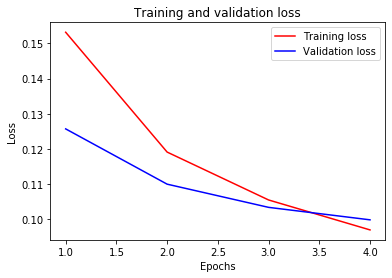

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

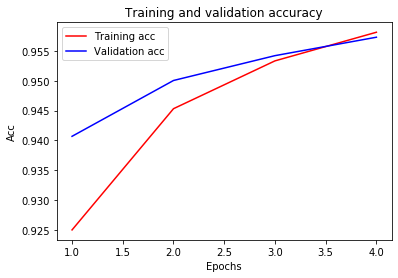

In [88]:

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

In [18]:
#model.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [85]:
# https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/ 
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(x_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n), the ratio of correctly predicted observation to the total observations.
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp), the ratio of correctly predicted positive observations to the total predicted positive observations
# If precision is high, we are making correct corrosion tags, but possibly missing corrosion items
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn), ratio of correctly predicted positive observations to the all observations in actual class
# So if recall is low, we are missing actual corrosion actions
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn), the weighted average of Precision and Recall
# If this is high, we are making correct corrosion tags and not missing actions that should be corrosion.
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.957326
Precision: 0.976155
Recall: 0.970193
F1 score: 0.973165


In [86]:
# Save the model
from keras.models import load_model
# creates a HDF5 file 
model.save('/Users/johncase/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/corr_model_1.h5')

In [ ]:
# returns a compiled model identical to the previously saved model
model = load_model('my_model.h5')